# Confidence Intervals - Lab

## Introduction

As we begin to talk about confidence intervals, it’s important to remember the difference between a **sample distribution** and a **sampling distribution**. 

Remember that a sample data distribution is the distribution of the data points within a single sample.  A sampling distribution is the probability distribution a statistic can take. Also recall that, by the Central Limit Theorem, the sampling distribution of the sample mean (x_hat) is approximately normal regardless of the shape of the original distribution of the variable.

As seen in a previous lab,  point estimates can provide some idea of a population parameter like the mean, but estimates are prone to error and also, taking multiple samples to get improved estimates may not be feasible all the time. 

## Objectives
You will be able to:
* Calculate and interpret confidence intervals

## Data 

If we wanted to know the average age of registered voters in some elections, we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

In a previous lab, we saw that the sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's run a simulation to investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [1]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period. We shall use a Poisson distribution to express a bimodal distribution.

In [2]:
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

Calculate the mean for the population and visualize the distribution. Also, describe the solution using five point statistics. (Hint: convert the population_ages array into a dataframe).

In [7]:

# Convert the population into a pandas dataframe pop_ages
pop_ages = pd.DataFrame(population_ages, columns=['Ages'])

# Calculate and print descriptive statistics for pop_ages
pop_ages.describe()

# The mean of population is: 42.985332

# count	250000 
# mean	42.985332
# std	13.211628
# min	18.000000
# 25%	29.000000
# 50%	47.000000
# 75%	54.000000
# max	84.000000


,Ages
count,250000.000000
mean,42.985332
std,13.211628
min,18.000000
25%,29.000000
50%,47.000000
75%,54.000000
max,84.000000


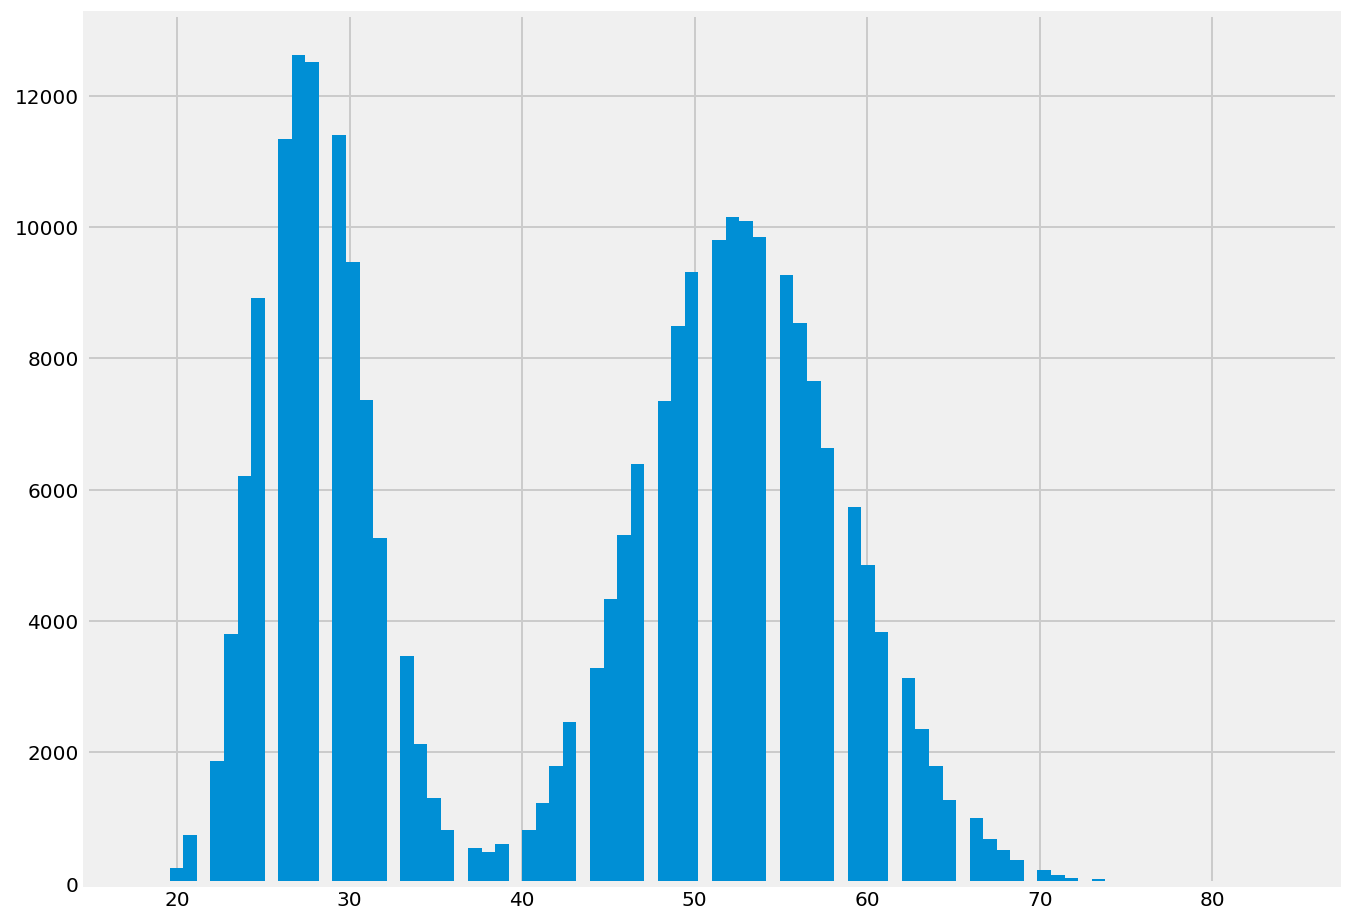

In [8]:
# Draw a histogram for pop ages
pop_ages.Ages.hist(bins='auto', figsize=(10,8))

Let's take a random sample of size 500 from this distribution and calculate the sample mean and standard deviation. Also, work out the difference between the population and sample mean. 

In [10]:
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = np.random.choice(a=population_ages, size=sample_size)

# Calculate sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

print ("Sample mean:", sample_mean)
print ("Sample std.:", sample_std)
print ("Difference between means:", population_ages.mean() - sample_mean)

# Sample mean: 43.49 
# Sample std.: 12.98529552994463
# Difference between means: -0.5046680000000023

Sample mean: 43.49
Sample std.: 12.98529552994463
Difference between means: -0.5046680000000023


We can see there is a small difference between sample mean and population mean. An increase in sample size can help reduce this difference. 

The central limit theorem states the distribution of **many sample means**, known as a **sampling distribution**, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed as we saw above. 

As a result, we can treat the sample mean as if it were drawn from a normal distribution. 

To illustrate, let's create a sampling distribution by taking 100 samples from our population and then making 100 point estimates of the mean. Calculate the mean and standard deviation of sample means.


In [11]:
np.random.seed(15)

point_estimates = []         # Make empty list to hold point estimates

# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates

for x in range(100):
    sample = np.random.choice(a=population_ages, size=500)
    point_estimates.append(sample.mean())


# Convert the point_estimates into a pandas dataframe
# Calculate and print descriptive statistics for the dataframe
df = pd.DataFrame(point_estimates, columns=['estimates'])
df.describe()

# count	100.000000
# mean	42.959380
# std	0.586404
# min	41.296000
# 25%	42.530000
# 50%	42.960000
# 75%	43.356000
# max	44.492000


,estimates
count,100.000000
mean,42.959380
std,0.586404
min,41.296000
25%,42.530000
50%,42.960000
75%,43.356000
max,44.492000


Let's visualize the distribution of sample means to check for normality.

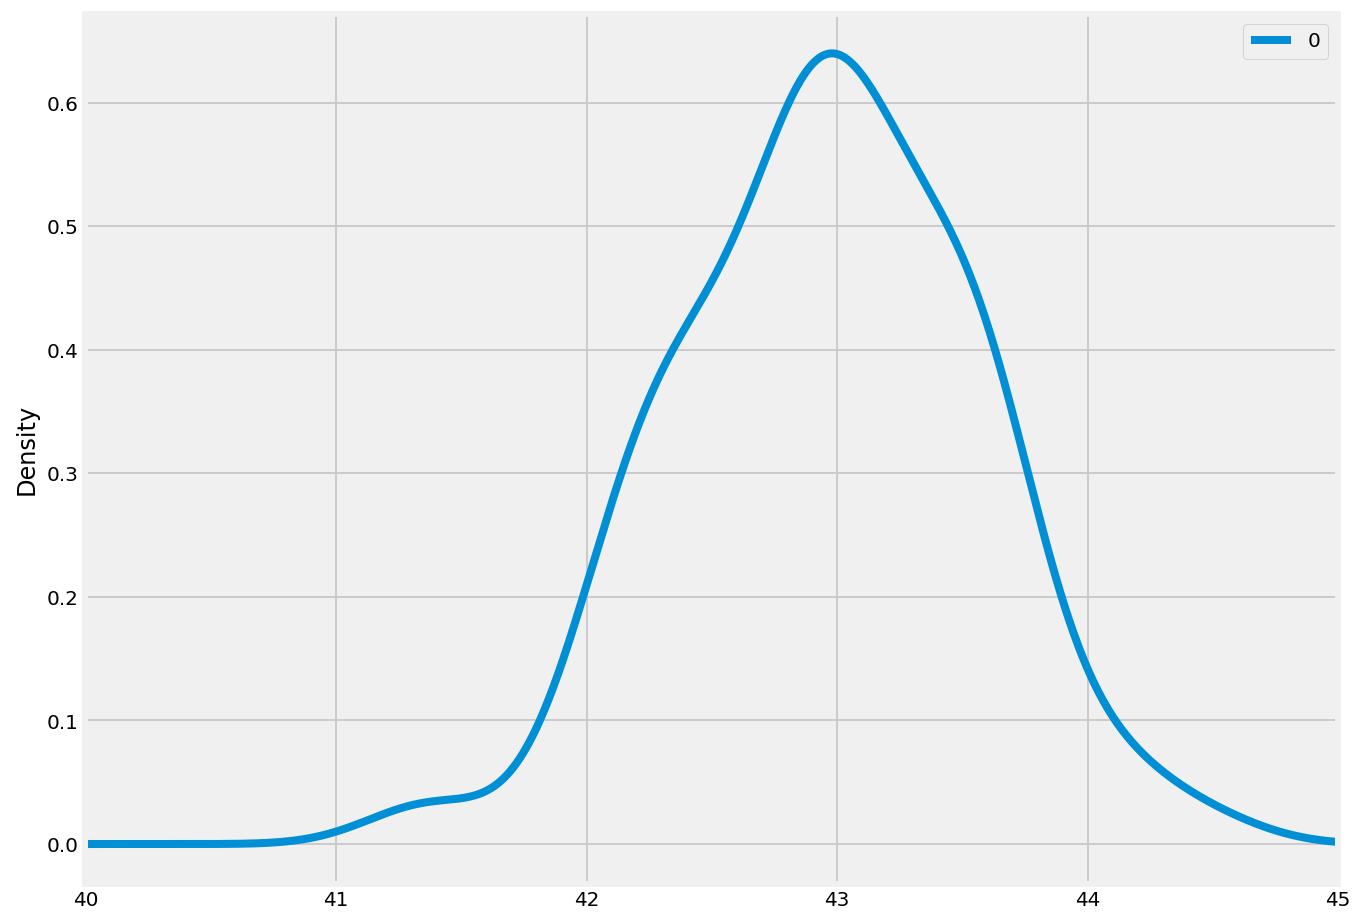

In [13]:
#Visualize the point estimates by plotting a density plot (use pandas)
pd.DataFrame(point_estimates).plot(kind='density', figsize=(10,8), xlim=(40,45))

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. This is where the central limit theorem comes into play. In addition, the mean of the sampling distribution approaches the true population mean. The more samples we take, the better our estimate of the population parameter is likely to be. 

## What is a Confidence Interval?

A **Confidence Interval** is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we **want** to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. *Higher confidence levels result in wider confidence intervals.*

We calculate a confidence interval by taking a point estimate and then adding and subtracting a **margin of error** to create a range. The margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

The margin of error for a known population standard deviation is:

> **Margin of Error = z ∗ σ / √n**

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. 

>The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval as shown in this image:
![](images/Normal-Distribution.png)

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -2.575 and 2.575.

It is more auitable to get z-critical values with `stats.norm.ppf()` as the results are more accurate.
> **`stats.norm.ppf(q, loc=0, scale=1)`**	is a percent point function (inverse of cdf — percentiles).

Create a function to input population and sample data to calculate the confidence intervals:

In [14]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = stats.norm.ppf(q = 0.975)  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = pop.std()

    # Calculate the margin of error using formula given above
    moe = z * (pop_stdev/math.sqrt(sample_size))

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    


print("z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

# z-critical value:
# 1.959963984540054

# Margin of error
# 1.158026699800684

# Confidence interval:
# (41.86997330019931, 44.186026699800685)

z-critical value:
1.959963984540054

Margin of error
1.158026699800684

Confidence interval:
(41.86997330019931, 44.186026699800685)


> Note that with calculated confidence intervals, we captured the true population mean of 42.9

We can create several such confidence intervals and visualize them to get a better sense of what it means to "capture" the true mean. 

Lets set a sample size of 1000 and take 25 samples to calculate the confidence intervals using the function above. 

In [16]:
np.random.seed(12)

# Select the sample size 
sample_size = 1000

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*        
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    # z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)



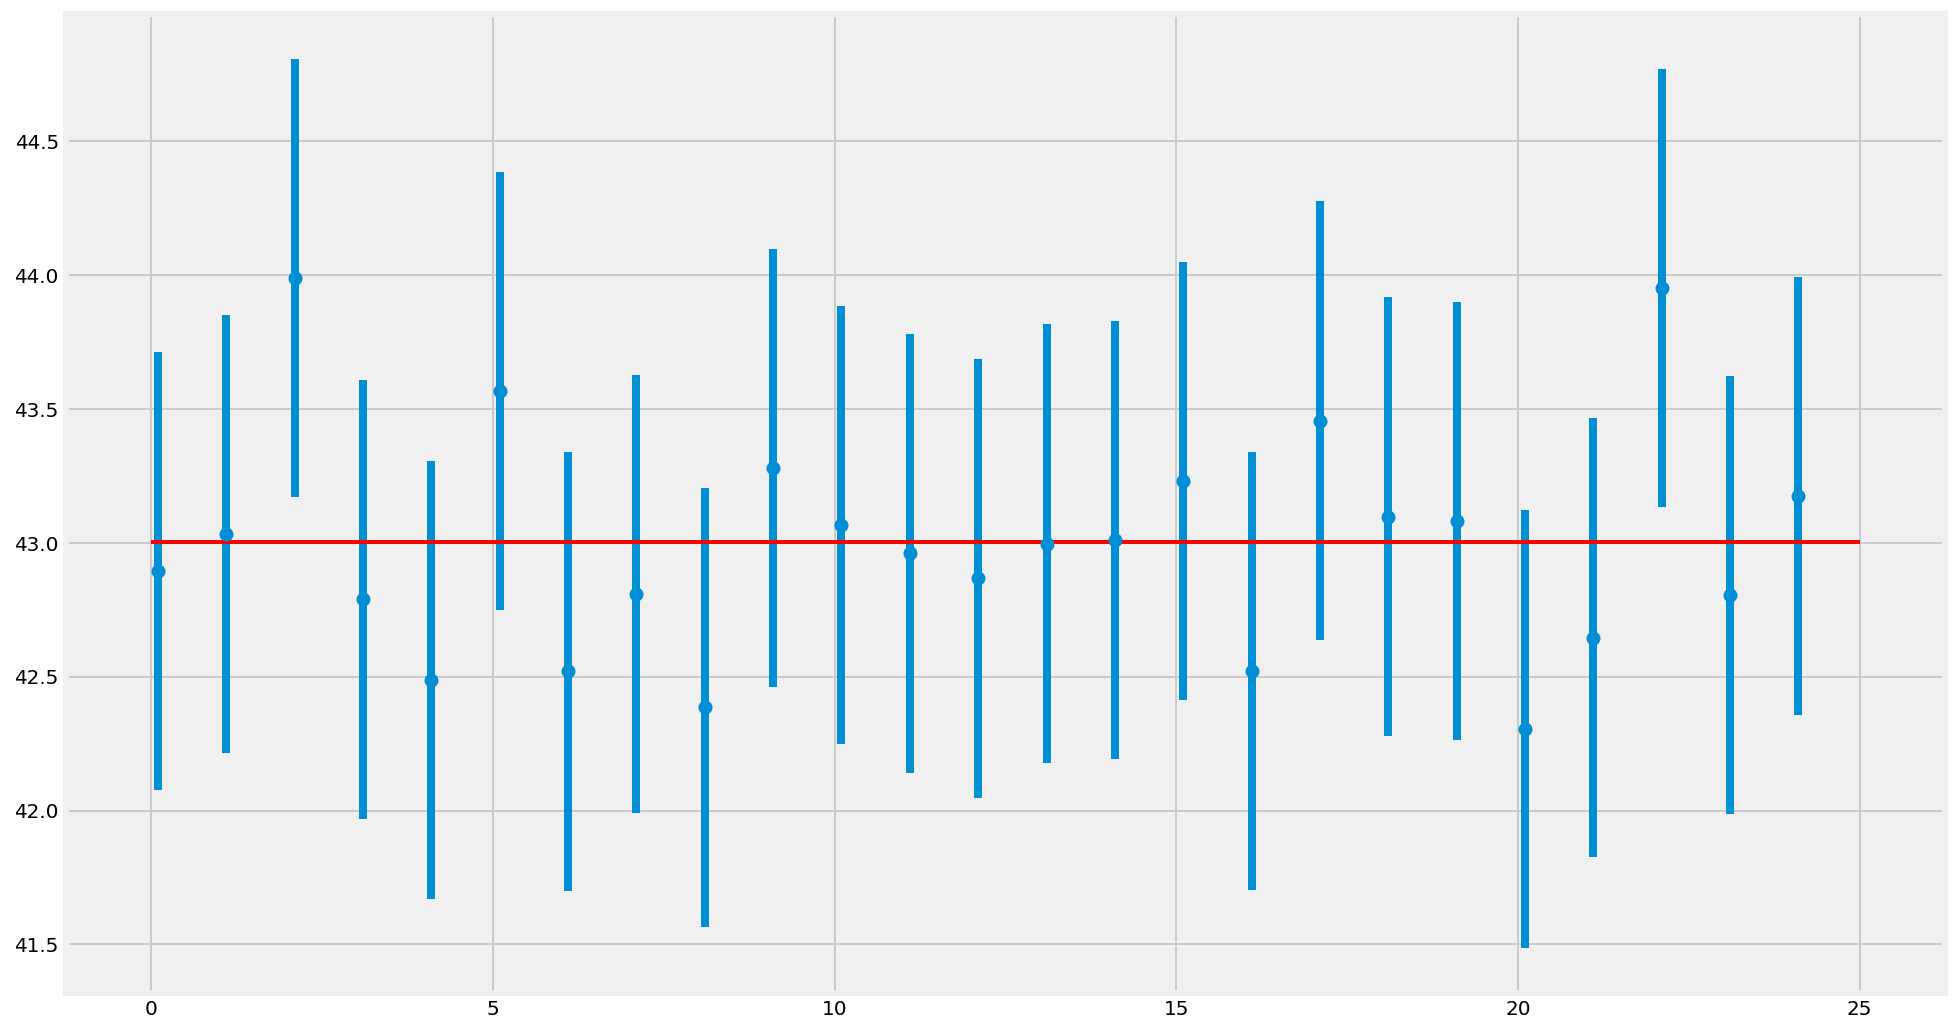

In [18]:
# plot the mean and confidence interval for each sample as error bars
# plot the population mean 

plt.figure(figsize=(15,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")


Notice that in the plot above, most of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## Interpreting the Confidence Interval

There are two interpretations we can derive from the above simulation, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the mean voter age is between 41.6 and 43.9.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean of population age. 

Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Summary

In this lab, we saw an introduction to confidence intervals and how to construct them from random samples. We also saw how due to the central limit theorem, the mean of sample means tends to be a normal distribution even if the population is bimodal. We also saw how the z-critical value can be used to define the confidence interval based on a confidence level required and the size of samples. We learned how to correctly interpret a confidence interval. 